# ESERCIZIO 5

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

## **Soluzione**

### Algoritmo di Metropolis

Per campionare da una generica densità di probabilità (nota), l'**algoritmo di Metropolis** (o **Metropolis-Hastings**) si rivela uno strumento molto utile.  
Questo algoritmo si basa su un ciclo di accettazione-rifiuto e richiede solamente la conoscenza dell'espressione della densità di probabilità bersaglio $(x)$.

L'algoritmo di Metropolis può essere riassunto in due fasi principali:

1. **Proporre un passo**, secondo una probabilità di transizione di prova $T(x \to x')$.  
   La lunghezza di questo passo è chiamata $s$, e il suo valore massimo $s_{\text{max}}$ è un parametro importante che deve essere scelto in modo appropriato.

2. **Accettare il passo proposto** con una probabilità di accettazione data da:

   $$
   A(x \to x') = \min\left(1, \frac{p(x') \, T(x' | x)}{p(x) \, T(x | x')}\right)
   $$

   dove, nel caso di questo esercizio, $T(x \to x') = T(x' \to x)$.  
   Se la probabilità di transizione $T$ è **simmetrica**, la probabilità di accettazione si semplifica in:

   $$
   A(x \to x') = \min\left(1, \frac{p(x')}{p(x)}\right)
   $$

   Di conseguenza, la mossa proposta viene accettata con probabilità 1 se il nuovo punto ha un valore più alto di $p(x)$, e con probabilità $\frac{p(x')}{p(x)}$ altrimenti.

In questo esercizio, la lunghezza del passo $s$ è estratta da una **distribuzione uniforme** nell'intervallo $[-s_{\text{max}}, s_{\text{max}}]$ oppure da una **distribuzione gaussiana** $\mathcal{N}(0, s_{\text{max}}^2)$.  
La lunghezza massima $s_{\text{max}}$ viene scelta in modo da ottenere un **tasso di accettazione** dei passi intorno al **50%**: questa regola empirica è importante perché, se i passi sono troppo ampi, ci sarà un alto tasso di rifiuto, rendendo inefficiente l'algoritmo.  
D'altra parte, se i passi sono troppo piccoli, potrebbe esserci **una forte correlazione** tra i punti successivi.

**Estratto del codice in cui implemento l'algoritmo di Metropolis**
La funzione Update è mostrata in seguito e svolge il compito di proporre un movimento nelle coordinate dei punti campionati secondo
- La distribuzione Gaussiana
- La distribuzione Uniforme
```cpp
vec Metropolis :: Campionamento(){

   this->Update(); // aggiorno le componenti del vettore 
    //x1(3)+= sqrt(x1(0)*x1(0)+x1(1)*x1(1)+x1(2)*x1(2)); // cosi non va bene perche ad ogni iterazione il vettore viene re inizializzato e le misure di raggio accumulate cancellate


    double alpha =0.;
    if(_orbitale==0) alpha= fmin(1, (Orbitales(_x)/Orbitales(_xold)));
    else if(_orbitale==1) alpha= fmin(1, (Orbitalep(_x)/Orbitalep(_xold)));

    double r = _rnd.Rannyu() ;

    if( r <= alpha ){
        n_accept ++;
        _xold=_x; // se il valore è accettato salvo nell xold questo valore in modo da poter nuovamente aggiornare _x nel nuovo passo e paragonarlo alla sua versione precedente
    }
    else{
        _x= _xold;// altrimenti riazzero il passo e riprovo ad aggiornarlo con un altro numero casuale
    }

    return _x;
    
}

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings


Per risolvere questo esercizio ho creato una classe: 
- la classe Metropolis

Al suo interno ho implementato i vari metodi per il corretto funzionamento del campionamento.
La struttura dell'algoritmo è mostrata nella finestra precedente, e lo step utilizzato per proporre le posizioni da campionare è stato selezionato tramite il metodo:

```cpp
double Metropolis :: SearchStep( double prec, int N, double target, double step){
    double corr = step;
    int n_acc=0;
    double ratio=0.;
    do{
        _step = step;
        n_acc = 0;
       
        //_x(0)=  //= arma::zeros<arma::vec>(3); // re inizializzo i vettori
        //_xold = _x;

        for(int i =0; i<N; i++){
            this->Update();
            bool b= this->Accept();
            if(b) n_acc ++;
        }
        ratio = (double)n_acc/N;

        if(corr>prec) corr /=2.;
        else if (corr< prec) corr=prec;

        if(ratio< (target-prec)) step -= corr;
        else if (ratio >(target-prec)) step += corr;
    } while ((ratio < target - prec ) || (ratio > target + prec ));
    cout << "Trovato lo step ottimale per la simulazione <step> = "<< _step<<endl;
    return _step;
}
```
Dove abbiamo come input:
- prec: la precisione richiesta attorno al valore target
- N: il numero di volte in cui proponiamo uno spostamento, per avere una buona statistica su cui calcolare la frazione di mosse accettate sul totale
- target: l obbiettivo da raggiungere come rapporto $\frac{n_{accettate}}{n_{tot}} = 0.5$
- step:lo step che viene via via aggiornato, da cui dipende il rapporto di cui sopra


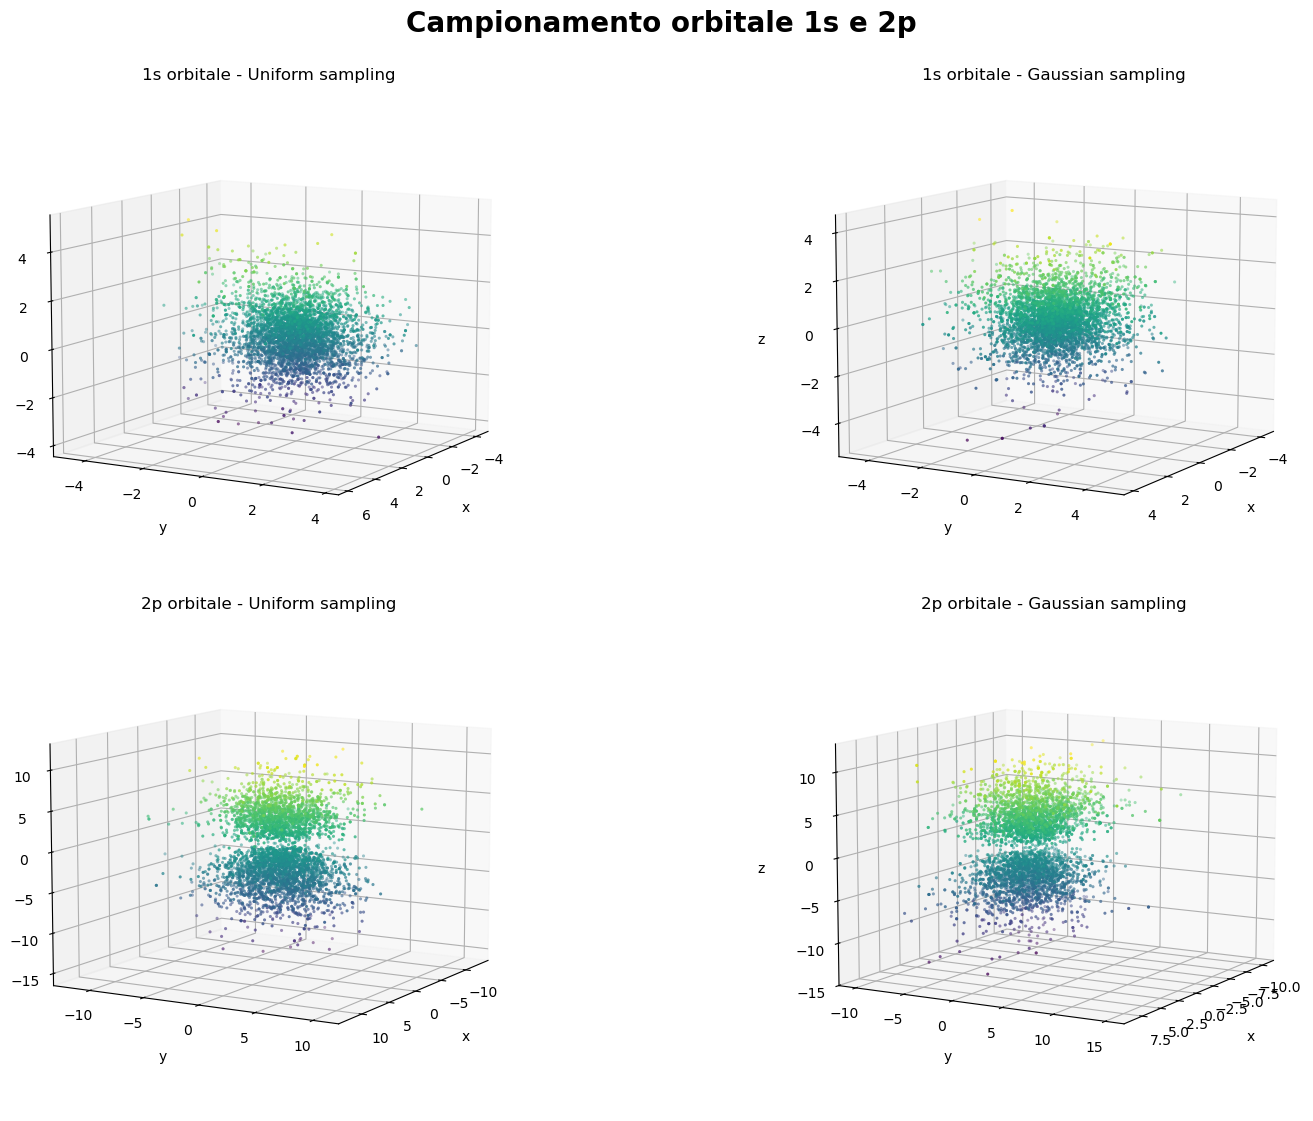

In [40]:
sampling_1s_unif = pd.read_csv('data/orbs_posiz_unif_5_1.out', sep=r'\s+')[['x', 'y', 'z']].values[:10000]
sampling_1s_gaus = pd.read_csv('data/orbs_posiz_gaus_5_1.out', sep=r'\s+')[['x', 'y', 'z']].values[:10000]
sampling_2p_unif = pd.read_csv('data/orbp_posiz_unif_5_1.out', sep=r'\s+')[['x', 'y', 'z']].values[:10000]
sampling_2p_gaus = pd.read_csv('data/orbp_posiz_gaus_5_1.out', sep=r'\s+')[['x', 'y', 'z']].values[:10000]

step = 2  # Riduci numero di punti visualizzati

fig = plt.figure(figsize=(18, 12))
fig.suptitle(r'Campionamento orbitale 1s e 2p', y=0.93, fontsize=20, fontweight= 'bold')

# Plot 1: Orbitale 1s - Uniforme
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(sampling_1s_unif[::step, 0], sampling_1s_unif[::step, 1], sampling_1s_unif[::step, 2],
           c=sampling_1s_unif[::step, 2], marker='.', edgecolor='none')
ax.set_title('1s orbitale - Uniform sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 2: Orbitale 1s - Gaussiana
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(sampling_1s_gaus[::step, 0], sampling_1s_gaus[::step, 1], sampling_1s_gaus[::step, 2],
           c=sampling_1s_gaus[::step, 2], marker='.', edgecolor='none')
ax.set_title('1s orbitale - Gaussian sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 3: Orbitale 2p - Uniforme
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(sampling_2p_unif[::step, 0], sampling_2p_unif[::step, 1], sampling_2p_unif[::step, 2],
           c=sampling_2p_unif[::step, 2], marker='.', edgecolor='none')
ax.set_title('2p orbitale - Uniform sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 4: Orbitale 2p - Gaussiana
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(sampling_2p_gaus[::step, 0], sampling_2p_gaus[::step, 1], sampling_2p_gaus[::step, 2],
           c=sampling_2p_gaus[::step, 2], marker='.', edgecolor='none')
ax.set_title('2p orbitale - Gaussian sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

plt.tight_layout(rect=[0, 0, 1, 0.93])  
plt.show()

Come si può vedere il campionamento risulta essere efficace considerando le posizioni dei punti nel piano 3D. Per campionare i punti, sono partito dalla posizione iniziale nell'origine dello spazio.





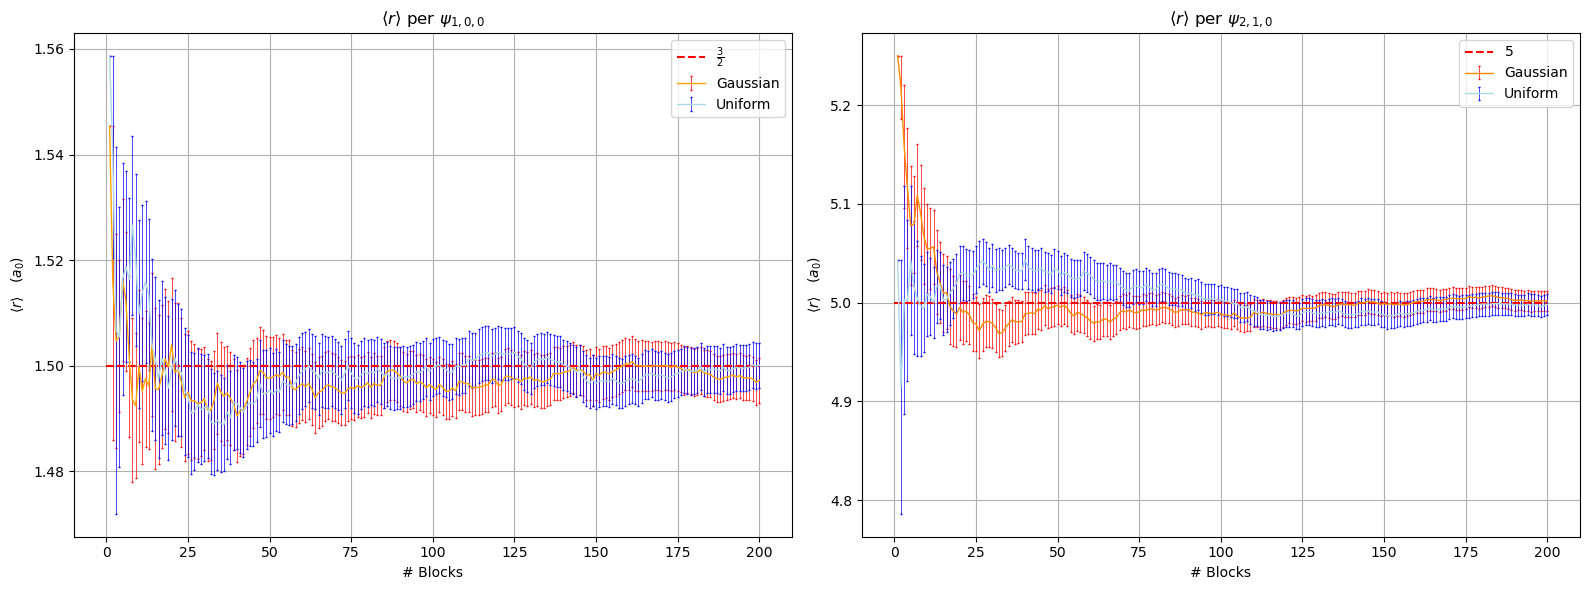

In [22]:
unif_s = pd.read_csv("data/orbs_ris_unif_5_1.out", sep=r'\s+')
unif_p = pd.read_csv("data/orbp_ris_unif_5_1.out", sep=r'\s+')
gaus_s = pd.read_csv("data/orbs_ris_gaus_5_1.out", sep=r'\s+')
gaus_p = pd.read_csv("data/orbp_ris_gaus_5_1.out", sep=r'\s+')

fig , axs = plt.subplots(1,2, figsize=(16,6))
n_blocks = unif_s['n_block'].max()

axs[0].errorbar(gaus_s['n_block'], gaus_s['r_average'], yerr=gaus_s['errore'], label='Gaussian', color='orange', ecolor ='r',elinewidth=0.5,linewidth=1, capsize =1)
axs[0].errorbar(unif_s['n_block'], unif_s['r_average'], yerr=unif_s['errore'], label='Uniform', ecolor='blue', color ='lightblue',elinewidth=0.5,linewidth=1, capsize =1)
axs[0].hlines(y=1.5, xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$\frac{3}{2}$')
axs[0].set_xlabel('# Blocks')
axs[0].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[0].set_title(r'$\langle r \rangle$ per $\psi_{1,0,0}$')
axs[0].grid()
axs[0].legend()

# Subplot per orbita 2p
axs[1].errorbar(gaus_p['n_block'], gaus_p['r_average'], yerr=gaus_p['errore'], label='Gaussian', color='darkorange', ecolor ='r',elinewidth=0.5,linewidth=1, capsize =1)
axs[1].errorbar(unif_p['n_block'], unif_p['r_average'], yerr=unif_p['errore'], label='Uniform', ecolor='blue', color ='lightblue',elinewidth=0.5,linewidth=1, capsize =1)
axs[1].hlines(y=5, xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$5$')
axs[1].set_xlabel('# Blocks')
axs[1].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[1].set_title(r'$\langle r \rangle$ per $\psi_{2,1,0}$')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

I grafici  nella cella superiore mostrano i risultati per i calcolo di $\langle r \rangle$ per $\psi_{1,0,0}$ e $\psi_{2,1,0}$. Le coordinate dei punti via via proposti, variano seguendo in un caso una distribuzione di probabilità Uniforme, nell' altro seguendo una distribuzione Gaussiana. Entrambe le distribuzioni sono state scelte simmetriche per poter semplificare il campionamento.
```cpp
void Metropolis :: Update(){
    if(_distr_type==0) {
        for(int i=0 ; i<3 ; i++) _x(i) += _rnd.Rannyu(-1, 1) *_step ;}
    else if( _distr_type==1){
        for(int i=0 ; i<3 ; i++) _x(i) += _rnd.Gauss(0,_step)  ;}
    else{cout << endl << "Errore, distribuzione di probabilità di partenza ignota.";
    }
}
Notiamo che non ci sono grosse differenze nei risultati in dipendenza dalla distribuzione, nè negli errori associati ad esse.

Sottolineo che il punto iniziale $x_0$ è stato scelto ragionevolmente nell'origine degli assi $(0, 0, 0)$, quindi il campionamento ha raggiunto rapidamente la convergenza.



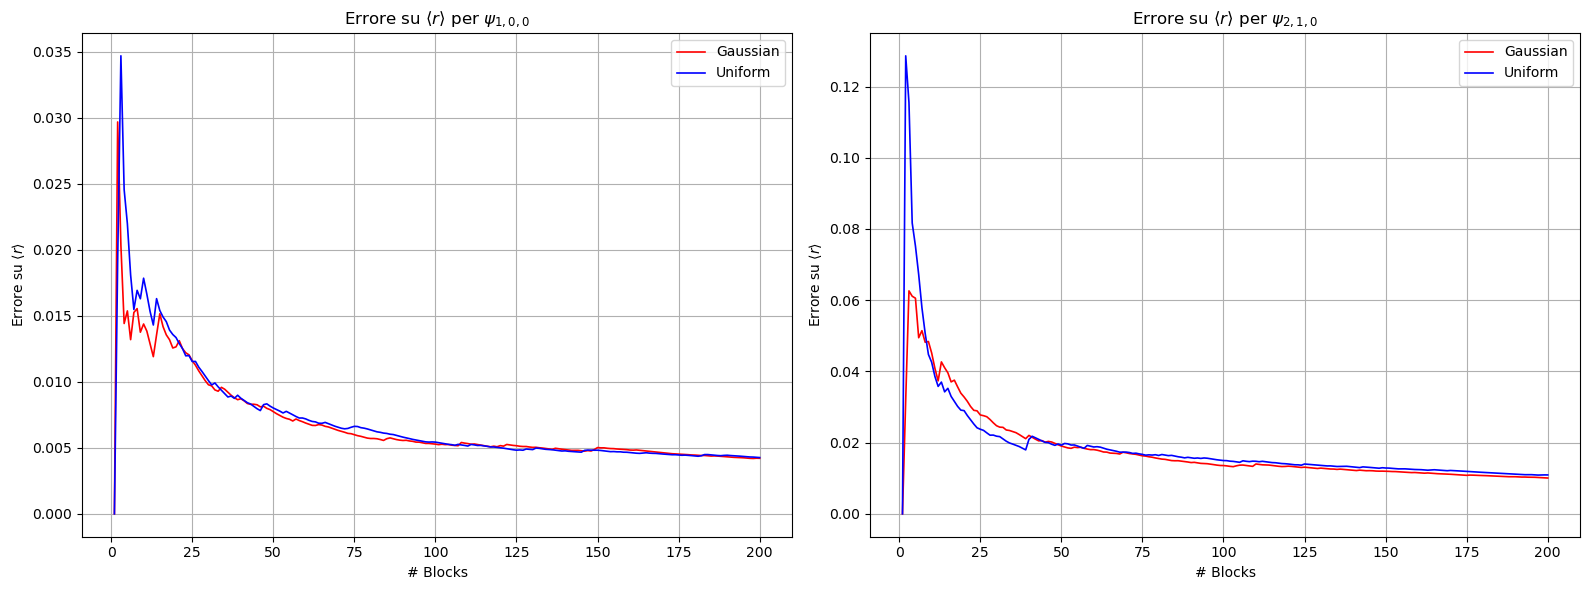

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
n_blocks = unif_s['n_block'].max()

# Subplot errore per orbita 1s
axs[0].plot(gaus_s['n_block'], gaus_s['errore'], label='Gaussian', color='r', linewidth=1.2)
axs[0].plot(unif_s['n_block'], unif_s['errore'], label='Uniform', color='blue', linewidth=1.2)
axs[0].set_xlabel('# Blocks')
axs[0].set_ylabel(r'Errore su $\langle r \rangle$')
axs[0].set_title(r'Errore su $\langle r \rangle$ per $\psi_{1,0,0}$')
axs[0].grid(True)
axs[0].legend()

# Subplot errore per orbita 2p
axs[1].plot(gaus_p['n_block'], gaus_p['errore'], label='Gaussian', color='r', linewidth=1.2)
axs[1].plot(unif_p['n_block'], unif_p['errore'], label='Uniform', color='blue', linewidth=1.2)
axs[1].set_xlabel('# Blocks')
axs[1].set_ylabel(r'Errore su $\langle r \rangle$')
axs[1].set_title(r'Errore su $\langle r \rangle$ per $\psi_{2,1,0}$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


Nel seguente grafico ho eseguito il campionameto con lo stesos identico codice cercando di rispondere alla domanda 
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?

Pertanto ho impostato come posizione iniziale di partenza il punto $x = (100, 100, 100 )$

La risposta alla domanda è evidente dagli scatterplots: in ciascuno dei casi il le posizione campionate partono da molto lontano rispetto alla zona dove abbiamo una alta densità di probabilità di campionamento. Tuttavia l' algoritmo tende ad accettare posizioni via via più probabili muovendosi di un certo step (calcolato dal metodo Search_step()) verso la con alta densità di probabilità. Possiamo vedere anche dal gradiente dei colori del grafico come man mano i punti convergano verso la zona che nei campionamenti precedenti era più dnesamente popolata.


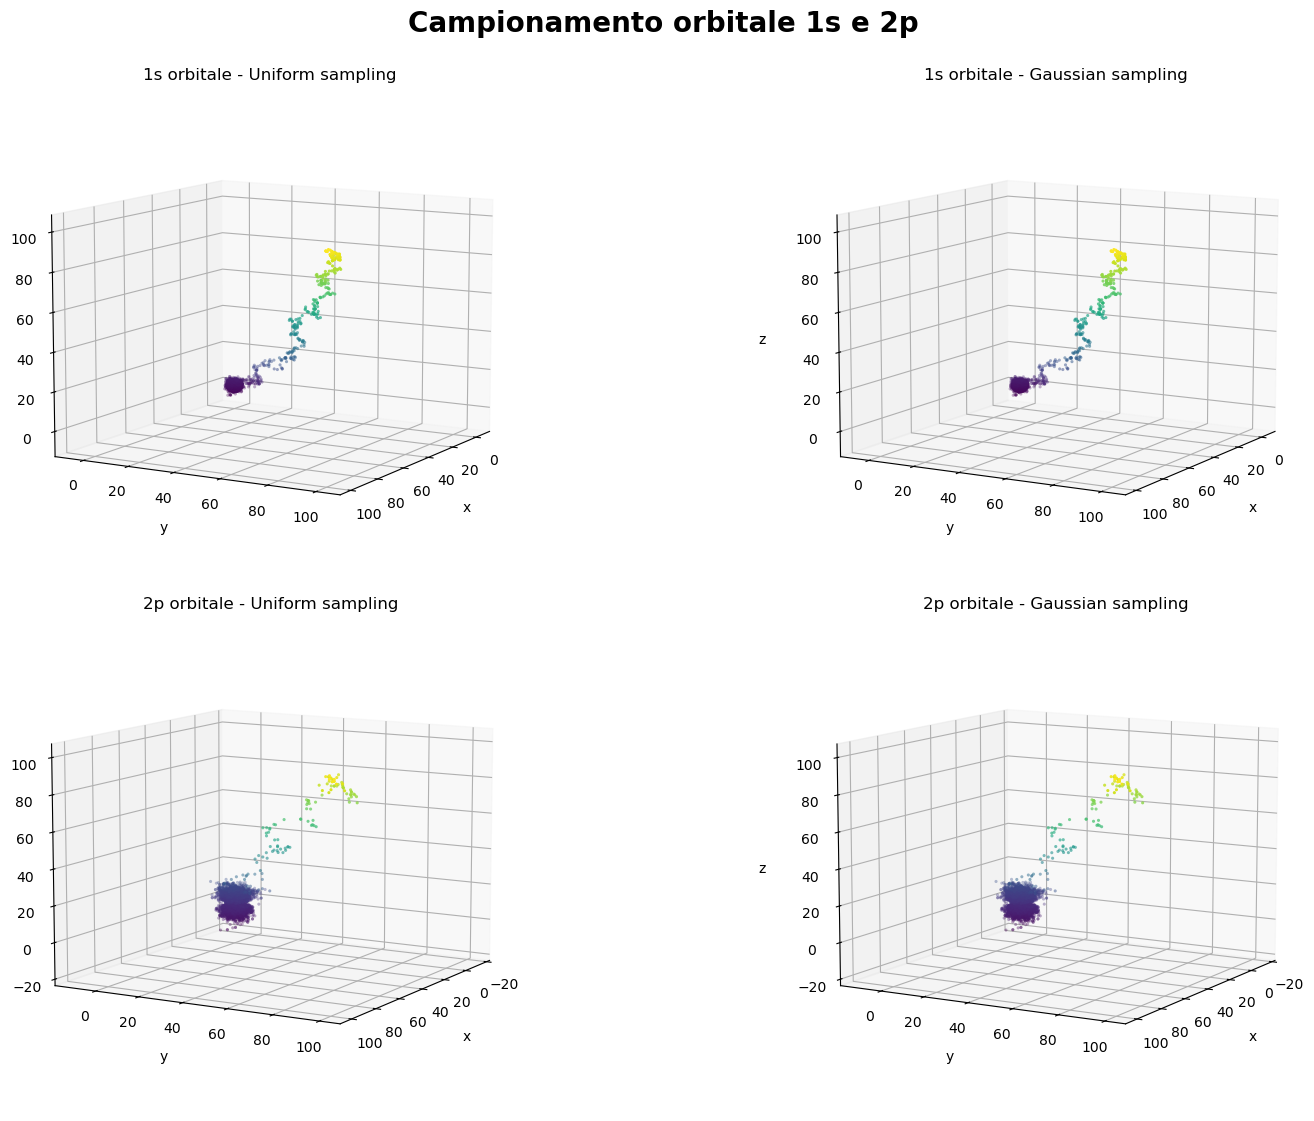

In [41]:
sampling_1s_lontano = pd.read_csv('data/orbs_posiz_unif_lontano.out', sep=r'\s+')[['x', 'y', 'z']].values[:20000]
sampling_1s_lontano = pd.read_csv('data/orbs_posiz_gaus_lontano.out', sep=r'\s+')[['x', 'y', 'z']].values[:20000]
sampling_2p_lontano = pd.read_csv('data/orbp_posiz_unif_lontano.out', sep=r'\s+')[['x', 'y', 'z']].values[:20000]
sampling_2p_lontano = pd.read_csv('data/orbp_posiz_gaus_lontano.out', sep=r'\s+')[['x', 'y', 'z']].values[:20000]

step = 2  # Riduci numero di punti visualizzati

fig = plt.figure(figsize=(18, 12))
fig.suptitle(r'Campionamento orbitale 1s e 2p', y=0.93, fontsize=20, fontweight= 'bold')

# Plot 1: Orbitale 1s - Uniforme
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(sampling_1s_lontano[::step, 0], sampling_1s_lontano[::step, 1], sampling_1s_lontano[::step, 2],
           c=sampling_1s_lontano[::step, 2], marker='.', edgecolor='none')
ax.set_title('1s orbitale - Uniform sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 2: Orbitale 1s - Gaussiana
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(sampling_1s_lontano[::step, 0], sampling_1s_lontano[::step, 1], sampling_1s_lontano[::step, 2],
           c=sampling_1s_lontano[::step, 2], marker='.', edgecolor='none')
ax.set_title('1s orbitale - Gaussian sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 3: Orbitale 2p - Uniforme
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(sampling_2p_lontano[::step, 0], sampling_2p_lontano[::step, 1], sampling_2p_lontano[::step, 2],
           c=sampling_2p_lontano[::step, 2], marker='.', edgecolor='none')
ax.set_title('2p orbitale - Uniform sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

# Plot 4: Orbitale 2p - Gaussiana
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(sampling_2p_lontano[::step, 0], sampling_2p_lontano[::step, 1], sampling_2p_lontano[::step, 2],
           c=sampling_2p_lontano[::step, 2], marker='.', edgecolor='none')
ax.set_title('2p orbitale - Gaussian sampling', pad=3)
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.view_init(10, 30)

plt.tight_layout(rect=[0, 0, 1, 0.93])  
plt.show()